# ITMAL Exercise

REVISIONS| |
---------| |
2018-1219| CEF, initial.                  
2018-0214| CEF, major update and put in sync with under/overfitting exe.         
2018-0220| CEF, fixed revision table malformatting.
2018-0225| CEF, minor text updates, and made Qc optional.
2018-0225| CEF, updated code, made more functions.
2018-0311| CEF, corrected RSME to RMSE.
2019-1008| CEF, updated to ITMAL E19.

## Generalization Error

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning, Ian Goodfellow, et. al. [DL], that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/E19_itmal/L07/Figs/dl_generalization_error.png" style="height:500px">

### Qa On Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

In [28]:
#### TODO: Qa...in text 
 #Generalization error describes how efficient an algorithm is in order to predict  from a given test data. 
 #Training error describes how efficient an algorithm is in order to predict from a given training data.
 #Underfitting zone, shows the area, where both the generalization error and the training error are high, as there hasn't been completed with fitting yet.
 #Optimal capacity, shows the area, where both underfitting and overfitting is sufficient, that is to say the errors aren't very high on both test and training data.
 #Overfitting zone, shows the area, where it has been fitted very much, therefor, it meets the expectations very well for the training data, but it is not as good for the new data - test data.
 #Generalization gap, shows the area, where the more it has been overfitted, the higher the gab will be, as it will be closing towards being specific.


### Qb A MSE-Epoch/Error Plot

Next, we look at a SGD model for fitting polynomial, that _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE: the generalization plot above (figure 5.3 in [DL]) and the plots below have different x-axis, and are not to be compared directly!

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


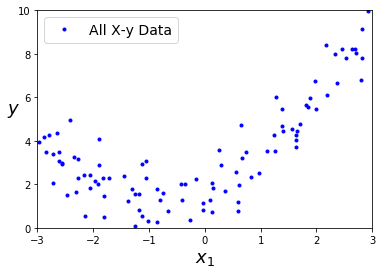

OK


In [29]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [30]:
#What is an epoch and what is mse_train and mse_val?
#-Epoch is a hyperparameter that defines the number of times the learning algorithm works through the entire training dataset - mse_train. 
#- Mse_train, is the the Mean Square Error in the training set at the epoch.
#- Mse_val, is the Mean Square Error in the test set at the epoch.

#- poly_scaler.fit_transform: It evaluates what should be done to get down to null and transforms the data to around zero.

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

  epoch= 344, mse_train=0.59, mse_val=1.52
  epoch= 345, mse_train=0.59, mse_val=1.53
  epoch= 346, mse_train=0.59, mse_val=1.53
  epoch= 347, mse_train=0.59, mse_val=1.53
  epoch= 348, mse_train=0.58, mse_val=1.53
  epoch= 349, mse_train=0.58, mse_val=1.54
  epoch= 350, mse_train=0.58, mse_val=1.54
  epoch= 351, mse_train=0.58, mse_val=1.54
  epoch= 352, mse_train=0.58, mse_val=1.55
  epoch= 353, mse_train=0.58, mse_val=1.55
  epoch= 354, mse_train=0.58, mse_val=1.55
  epoch= 355, mse_train=0.58, mse_val=1.55
  epoch= 356, mse_train=0.58, mse_val=1.56
  epoch= 357, mse_train=0.58, mse_val=1.56
  epoch= 358, mse_train=0.58, mse_val=1.56
  epoch= 359, mse_train=0.58, mse_val=1.57
  epoch= 360, mse_train=0.58, mse_val=1.57
  epoch= 361, mse_train=0.58, mse_val=1.57
  epoch= 362, mse_train=0.58, mse_val=1.57
  epoch= 363, mse_train=0.58, mse_val=1.58
  epoch= 364, mse_train=0.58, mse_val=1.58
  epoch= 365, mse_train=0.58, mse_val=1.58
  epoch= 366, mse_train=0.58, mse_val=1.59
  epoch= 36

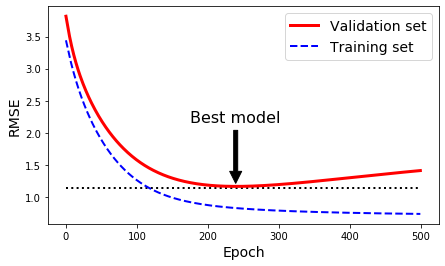

OK


In [37]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        sgd_reg.fit(X_train, y_train)
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

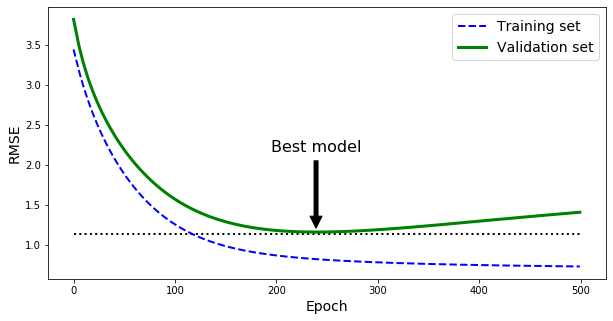

In [32]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [33]:
# TODO: Qb...code review in text form
# The code above runs through data from before in a stochastic gradient decent. This is done based on our choice
# 500 times. For each time randomly jumps to a new location and approaches the global minimum. This approach 
# prevents the model from hitting the local minimum and gets "stuck" there. Here approaching the global minimum
# at start and sink down there. 
# Where there are too many epochs we will risk overfitting again, which can also be seen in the above diagram. 
# It is being seen that the training set's RMSE is getting smaller and smaller, and apparently better and better,
# but slowly the RMSE of the validation set is increasing.

### [OPTIONAL] Qc  Early Stopping

How would you implement ___early stopping___, in the code above? 

Try it out in the code, and write an explanation of the early stopping concept.

In [34]:
# TODO: Qc...

### Qd Explain the Polynomial RMSE-Capacity plot

Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below, and explain the generated RMSE-Capacity plot. Why does the _training error keep dropping_, while the _CV-error drops_ until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10?

Iterating...degrees= range(1, 8)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44


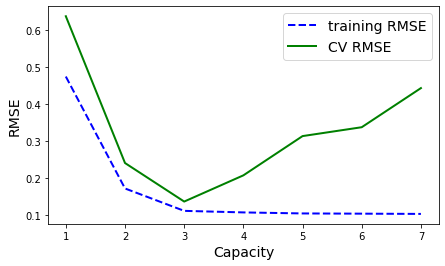

OK


In [35]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_cv= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_cv=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_cv:4.2f}")
    
    capacities    .append(d)
    rmses_training.append(rmse_training)
    rmses_cv      .append(rmse_cv)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training, "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_cv, "g-", linewidth=2, label="CV RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [36]:
# TODO: Qd...answer in text form